Cluster centers:
 [[-7.38637079e-01 -9.15357017e-01  5.19404389e-02 -2.11626894e-01
   3.98041905e-02  3.60783018e-02  9.60990680e-03  1.99837636e-01
   2.95873279e-02  3.29124050e-02 -1.26762835e-02  5.83507836e-02
   5.54695369e-02  3.01249800e-02 -2.76446184e-02 -1.90185567e-03
   4.56314357e-03  1.24359723e-03  1.16001744e-15  9.09631455e-16
   1.12390875e-15 -3.73442016e-16 -2.03113197e-16]
 [ 1.66677246e+00  1.65323722e+00 -1.04947542e-01  4.61593944e-01
   2.77387050e-02 -1.31240219e-02  1.02867664e-01 -3.69413385e-01
   3.95431569e-02 -3.91494786e-02 -1.39570285e-02 -1.27911025e-01
  -1.39111377e-01  5.41219844e-02 -3.73159211e-02  6.88883371e-03
   3.24592600e-02 -8.78148657e-04 -9.71574994e-16 -6.35285353e-16
  -4.99816842e-16  1.88665753e-16  1.15439561e-17]]

Metrics for k=2:
Silhouette Score: 0.1830
Calinski-Harabasz Score: 4397.6476
Davies-Bouldin Index: 2.4346


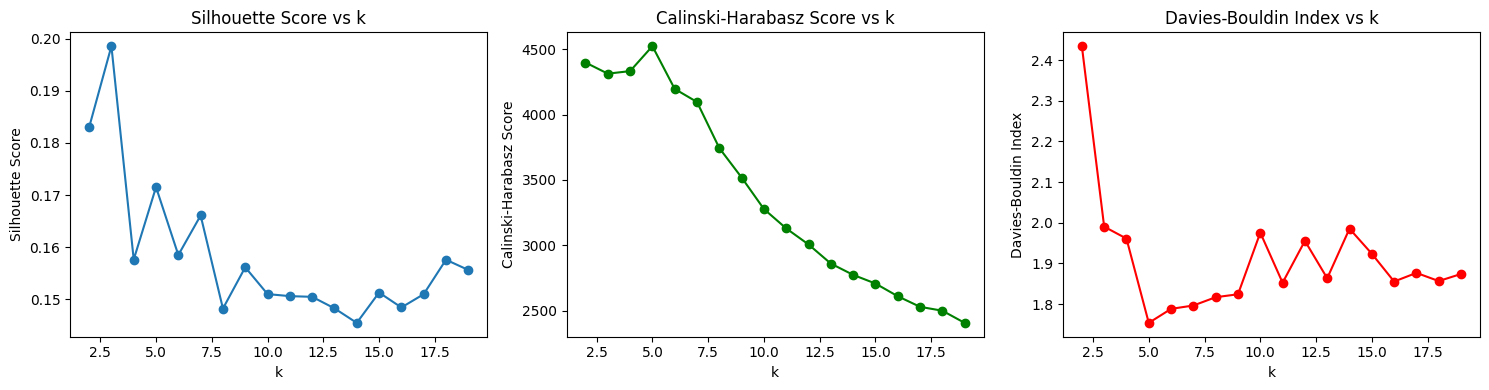

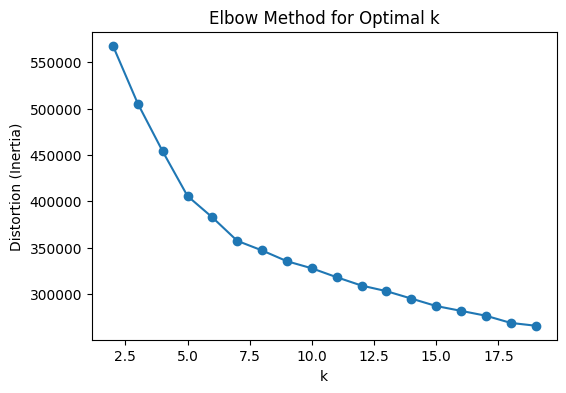

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# -------------------
# Load dataset
# -------------------
data = pd.read_csv('dataset(National_Health_Interview_Surve).csv')

# Drop target + irrelevant columns for clustering
drop_columns = [
    'Category', 'LocationAbbr', 'LocationDesc', 'DataSource',
    'Data_Value_Unit', 'Data_Value_Type', 'Data_Value_Footnote_Symbol',
    'Data_Value_Footnote', 'Numerator', 'LocationID', 'DataValueTypeID',
    'GeoLocation', 'Geographic Level', 'StateAbbreviation'
]
X = data.drop(columns=drop_columns, errors='ignore')

# Categorical columns to encode
categorical_cols = [
    "Topic", "Question", "Response", "Age", "Sex", "RaceEthnicity",
    "RiskFactor", "RiskFactorResponse", "TopicID", "CategoryID",
    "QuestionID", "ResponseID", "AgeID", "SexID", "RaceEthnicityID",
    "RiskFactorID", "RiskFactorResponseID", "YearStart", "YearEnd"
]

# Fill missing values in categorical columns
X[categorical_cols] = X[categorical_cols].fillna("Unknown")

# Encode categorical columns
for col in categorical_cols:
    if col in X.columns:
        X[col] = LabelEncoder().fit_transform(X[col])

# Drop any remaining NaNs
X = X.dropna()

# Standardize data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Optional: PCA to reduce dimensionality
n_components = min(23, X_std.shape[1])
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

# Remove outliers using Isolation Forest
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = isolation_forest.fit_predict(X_pca)
X_no_outliers = X_pca[outliers != -1]

# -------------------
# A4 - KMeans clustering (k=2)
# -------------------
kmeans_k2 = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_k2.fit(X_no_outliers)

# print("Cluster labels (first 20):", kmeans_k2.labels_[:20])
print("Cluster centers:\n", kmeans_k2.cluster_centers_)

# -------------------
# A5 - Clustering metrics for k=2
# -------------------
silhouette_k2 = silhouette_score(X_no_outliers, kmeans_k2.labels_)
ch_k2 = calinski_harabasz_score(X_no_outliers, kmeans_k2.labels_)
db_k2 = davies_bouldin_score(X_no_outliers, kmeans_k2.labels_)

print("\nMetrics for k=2:")
print(f"Silhouette Score: {silhouette_k2:.4f}")
print(f"Calinski-Harabasz Score: {ch_k2:.4f}")
print(f"Davies-Bouldin Index: {db_k2:.4f}")

# -------------------
# A6 - Evaluate clustering for different k values
# -------------------
silhouette_scores = []
ch_scores = []
db_scores = []
k_values = range(2, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_no_outliers)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_no_outliers, labels))
    ch_scores.append(calinski_harabasz_score(X_no_outliers, labels))
    db_scores.append(davies_bouldin_score(X_no_outliers, labels))

# Plot metrics vs k
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o', color='g')
plt.xlabel("k")
plt.ylabel("Calinski-Harabasz Score")
plt.title("Calinski-Harabasz Score vs k")

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o', color='r')
plt.xlabel("k")
plt.ylabel("Dav(base) pratyush@pratyush-Dell-G15-5520:~/Pictures/Screenshots$ magick image_43.png image_43.pdf
Command 'magick' not found, did you mean:
  command 'magics' from deb magics++ (4.14.2-2)
  command 'magic' from deb magic (8.3.105+ds.1-1.1)
Try: sudo apt install <deb name>
es-Bouldin Index vs k")

plt.tight_layout()
plt.show()

# -------------------
# A7 - Elbow method
# -------------------
distortions = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_no_outliers)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, distortions, marker='o')
plt.xlabel("k")
plt.ylabel("Distortion (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()
